# Logistic Regression

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("SNAds.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
Gender = df["Gender"]

def gen(x):
    if x == "Male":
        val = 1 
    elif x == "Female":
        val = 0
    else:
        val = None  
    return val

new_gen = Gender.apply(gen)

df["Gender"] = new_gen

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [34]:
y_train = np.array(df["Purchased"])

m = len(y_train)

x_features = ["Gender" , "Age" , "EstimatedSalary"]

n = len(x_features)

x_train = np.transpose(np.array([ df[x_features[i]] for i in range(n)]))


In [35]:
x_train

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

### sigmoid function

In [36]:
def sigmoid(f):
    return 0.5 * (1 + np.tanh(0.5 * f))


In [37]:
sigmoid(1000000)

1.0

### cost function

In [38]:
def calc_cost(m,X,Y,w,b):
    
    J = 0
    
    for i in range(m):
        
        z_wb_i = np.dot(w,X[i]) + b
        f_wb_i = sigmoid(z_wb_i)
        
        J += -Y[i] * np.log(f_wb_i)  - (1-Y[i]) * np.log(1-f_wb_i)
        
        
    return J/m    

In [39]:
w_init = np.zeros(n)
b_init = 0

cost = calc_cost(m,x_train,y_train,w_init,b_init)
cost

0.6931471805599467

### Gradient discent

In [40]:
def calculate_gradient(m ,n ,X ,Y ,w ,b):
    
    gra_w = np.array([(1/m) * np.sum([  (np.dot(w,X[i]) + b - Y[i]) * X[i][j]  for i in range(m)  ]) for j in range(n)])
     
    dir_b = (1/m) * np.sum([  (np.dot(w,X[i]) + b - Y[i])   for i in range(m)  ])
    
    return gra_w , dir_b
    
        

In [77]:
def gradient_descent(X,Y,w,b , alpha , max_iter):
    
    m,n = X.shape
    
    cost = []
    
    for i in range(max_iter):
            
        c = calc_cost(m,X,Y,w,b)
        cost.append(c)
        
        #gra_w = np.array([  (1/m)* np.sum([  (np.dot(w,X[i])+b - Y[i])*X[i][j]   for i in range(m)]) for j in range(n)])
        #dir_b = (1/m)* np.sum([  (np.dot(w,X[i])+b - Y[i]) for i in range(m)])
        
        #vectorized 
        gra_w = np.array( (1/m) * np.dot( X.T , ( (np.dot(w,X) + b - Y  )   )))
        
        dir_b = (1/m) * (np.dot(w,X) + b - Y )
        
    
        w = w - alpha * gra_w
        b = b - alpha * dir_b
            
    return w,b , np.array(cost)


In [79]:
w_pre , b_pre , cost = gradient_discent(m,n,x_train,y_train,w_init,b_init,0.0000000001,1000)
w_pre

array([-4.42716134e-10,  2.87796504e-07,  5.12005338e-06])

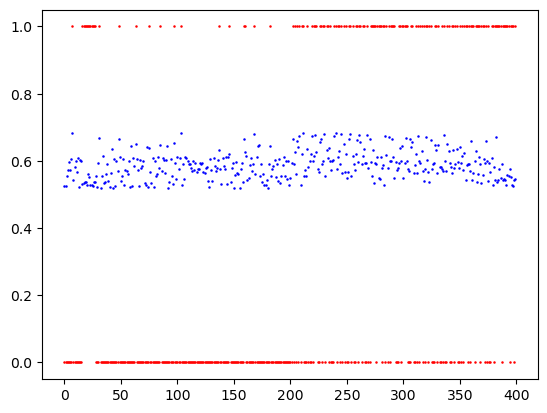

In [87]:
pred = np.array([sigmoid(np.dot(x_train[i],w_pre) + b_pre) for i in range(m)])

x = np.arange(0,m,1)

plt.plot(x,pred ,'o', ms = 0.8 , color = "blue")
plt.plot(x,y_train , 'o' , ms = 0.8 , color = "red")